In [110]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats 
import pandas as pd
passData = pd.read_csv('train.csv', index_col='PassengerId')
passData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Определите количество мужчин и женщин, которые ехали на корабле.

In [6]:
#женщины
passData[passData['Sex']=='female']['Sex'].count()

314

In [115]:
#мужчины
passData[passData['Sex']=='male']['Sex'].count()

577

Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров

In [8]:
#выжившие
passData[passData['Survived']==1]['Survived'].count()

342

In [9]:
#доля выживших
passData[passData['Survived']==1]['Survived'].count()/passData['Survived'].count()

0.3838383838383838

 Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [116]:
# пассажиры первого класса
passData[passData['Pclass']==1]['Pclass'].count()

216

In [11]:
# доля пассажиров первого класса
passData[passData['Pclass']==1]['Pclass'].count()/passData['Pclass'].count()

0.24242424242424243

Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

In [13]:
#среднее
passData['Age'].mean()

29.69911764705882

In [14]:
#медиана
passData['Age'].median()

28.0

Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [17]:
stats.pearsonr(passData['SibSp'],passData['Parch'])

(0.41483769862015624, 2.2418236681382365e-38)

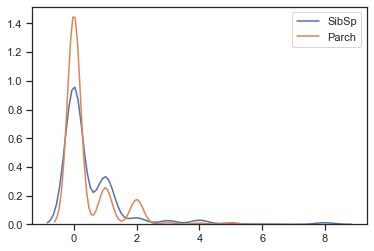

In [35]:
sns.kdeplot(data=passData['SibSp'])
sns.kdeplot(data=passData['Parch'])

Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [106]:
def SearchName(name):
    if 'Miss. ' in name:
        list1 = name.split('Miss. ')
        return(list1[1].split()[0])
    elif "Mrs. "  in name:
        list1 = name.split('Mrs. ')
        newname = list1[1]
        if '(' in newname:
            return(list1[1].split('(')[1].split(')')[0].split()[0])
        else:
            return(newname.split()[0])

In [107]:
passData[passData["Sex"]=="female"]["Name"].apply(SearchName).value_counts().idxmax()

'Anna'

Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [36]:
stats.pearsonr(passData['Survived'], passData['Pclass'])

(-0.33848103596101514, 2.5370473879790813e-25)

Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

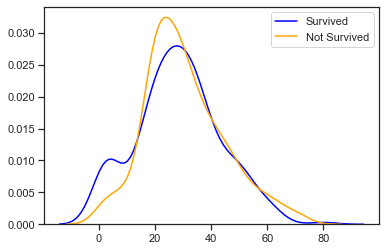

In [44]:
sns.kdeplot(passData[passData["Survived"]==1]["Age"].rename('Survived'),color='blue')
sns.kdeplot(passData[passData["Survived"]==0]["Age"].rename('Not Survived'),color='orange')

Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

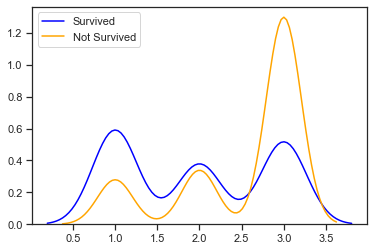

In [45]:
sns.kdeplot(passData[passData["Survived"]==1]["Pclass"].rename('Survived'),color='blue')
sns.kdeplot(passData[passData["Survived"]==0]["Pclass"].rename('Not Survived'),color='orange')

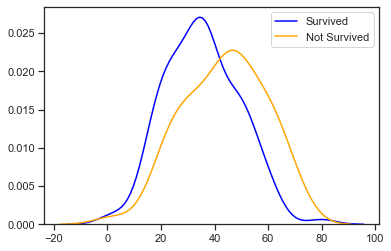

In [111]:
sns.kdeplot(passData[passData["Survived"]==1][passData["Pclass"]==1]['Age'].rename('Survived'),color='blue')
sns.kdeplot(passData[passData["Survived"]==0][passData["Pclass"]==1]['Age'].rename('Not Survived'),color='orange')

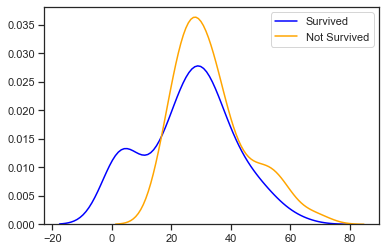

In [112]:
sns.kdeplot(passData[passData["Survived"]==1][passData["Pclass"]==2]['Age'].rename('Survived'),color='blue')
sns.kdeplot(passData[passData["Survived"]==0][passData["Pclass"]==2]['Age'].rename('Not Survived'),color='orange')

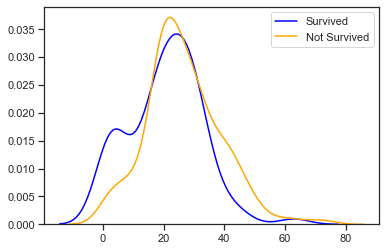

In [113]:
sns.kdeplot(passData[passData["Survived"]==1][passData["Pclass"]==3]['Age'].rename('Survived'),color='blue')
sns.kdeplot(passData[passData["Survived"]==0][passData["Pclass"]==3]['Age'].rename('Not Survived'),color='orange')

Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

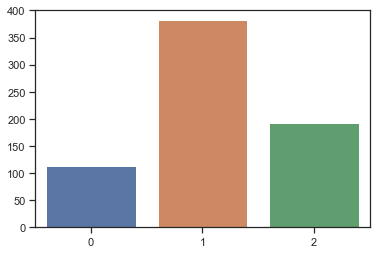

In [114]:
sns.barplot(data = [[passData[passData["Age"]<18]["Pclass"].count()],
                    [passData[passData["Sex"]=="male"][passData["Age"]>18]["Pclass"].count()],
                    [passData[passData["Sex"]=="female"][passData["Age"]>18]["Pclass"].count()]])